In [1]:
import os
from PIL import Image

In [2]:
image_path=r'C:\Users\u013709\AnalyticsVidhya\OuShnwqSRUqDrZBSYAxo_Human Action Recognition_New\Human Action Recognition\train\cycling'

In [3]:
img_name='Image_11.jpg'

In [4]:
img=Image.open(os.path.join(image_path,img_name))
img.show()

In [5]:
import torch

In [6]:
from torchvision import datasets, transforms
from  torch.utils.data import DataLoader

In [7]:
transform = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ]
)

In [8]:
train_data = datasets.ImageFolder(
    root=r"C:\Users\u013709\AnalyticsVidhya\OuShnwqSRUqDrZBSYAxo_Human Action Recognition_New\Human Action Recognition\train",
    transform=transform,
)

In [9]:
train_data_path = r"C:\Users\u013709\AnalyticsVidhya\OuShnwqSRUqDrZBSYAxo_Human Action Recognition_New\Human Action Recognition\train"

In [10]:
test_data_path = r"C:\Users\u013709\AnalyticsVidhya\OuShnwqSRUqDrZBSYAxo_Human Action Recognition_New\Human Action Recognition\test"

In [11]:
test_data = datasets.ImageFolder(
    root=r"C:\Users\u013709\AnalyticsVidhya\OuShnwqSRUqDrZBSYAxo_Human Action Recognition_New\Human Action Recognition\test",
    transform=transform,
)

Counter({'cycling': 714, 'dancing': 714, 'drinking': 714, 'eating': 714, 'sitting': 714})


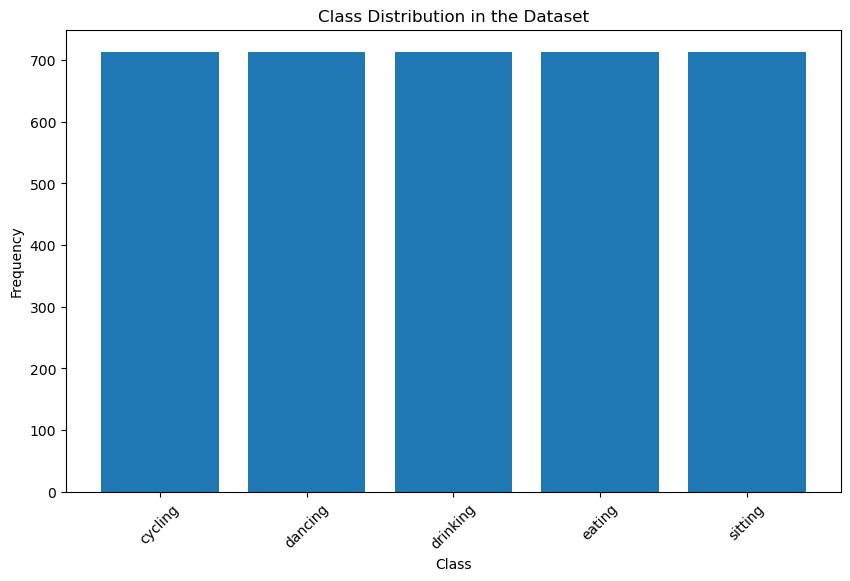

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Checking class distribution
class_distribution = Counter(
    [
        label
        for label in os.listdir(train_data_path)
        if os.path.isdir(os.path.join(train_data_path, label))
    ]
)

# Get the count of images in each class
for label in class_distribution:
    class_distribution[label] = len(os.listdir(os.path.join(train_data_path, label)))

# Print the class distribution
print(class_distribution)

# Plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45)  # Rotate class labels for better readability
plt.show()

In [18]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [19]:
import torch.nn as nn

In [20]:
LeNet5

NameError: name 'LeNet5' is not defined

In [21]:
# Define LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=5, padding=0, stride=1
        )  # Default padding=0, stride=1
        self.conv2 = nn.Conv2d(
            6, 16, kernel_size=5, padding=0, stride=1
        )  # Default padding=0, stride=1
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))  # Conv1
        x = torch.nn.functional.max_pool2d(
            x, kernel_size=2, stride=2
        )  # Max Pooling with kernel size 2x2, stride 2
        X = torch.nn.functional.relu(self.conv2(x))  # Conv2
        X = torch.nn.functional.max_pool2d(
            x, kernel_size=2, stride=2
        )  # Max Pooling with kernel size 2x2, stride 2
        X = torch.flatten(x, 1)  # Flattening
        x = torch.nn.functional.relu(self.fc1(x))  # Fully connected Layer 1
        X = torch.nn.functional.relu(self.fc2(x))  # Fully connected Layer 2
        x = self.fc3(x)  # Output Layer
        return X

In [22]:
model = LeNet5()

In [23]:
model.compile

<bound method Module.compile of LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [24]:
import torch.optim as optim

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

In [25]:
# Create DataLoader for training and validation sets
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [26]:
train_loader

In [27]:
device = torch.device("cpu")

In [28]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

# Initialize the lists to store train and test loss for each epoch
train_losses = []
test_losses = []

# Train the model
num_epochs = 20
best_loss = torch.inf
patience = 5
epochs_since_best = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # For models that return auxiliary outputs
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)  # Store the train loss for this epoch
    train_accuracy = 100.0 * correct / total

    print(
        f"Epoch [{epoch + 1}/{num_epochs}], "
        f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%"
    )

    # Evaluate on the test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # For models that return auxiliary outputs
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)  # Store the test loss for this epoch
    test_accuracy = 100.0 * correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Check for best accuracy and stop if not improved after five more epochs
    if test_loss < best_loss:
        best_loss = test_loss
        epochs_since_best = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the model
        print(f"Updated best model with accuracy: {test_accuracy:.2f}%")
    else:
        epochs_since_best += 1
        if epochs_since_best > patience:
            print("Stopping early: no improvement after five consecutive epochs.")
            break

  0%|          | 0/112 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2688x14 and 400x120)